VTC Academy AI Specialist - Lesson 04 : Data Mining Pipeline and Preprocessing 

In [ ]:
# Library 
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, Image

In [ ]:
# User-define Variables and Setup
import warnings
warnings.filterwarnings("ignore")

WorkingDir = "D:\\TUANTA\\VTC Academiy\\AI VTCA Teaching Materials\\Short-Course AI\\4. AI Specialist(AI Engineer)"
WorkingDir += "\\2. Labs\\AI Specialist Lesson 04"

os.chdir(WorkingDir)

print(checkPath)

D:\TUANTA\VTC Academiy\AI VTCA Teaching Materials\Short-Course AI\4. AI Specialist(AI Engineer)\2. Labs\AI Specialist Lesson 04


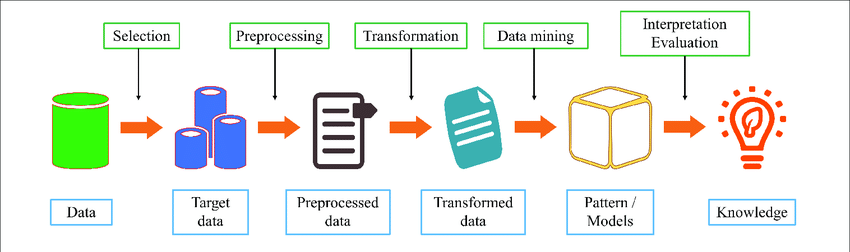

In [ ]:
display(Image(filename='Data Mining Process 01.png'))

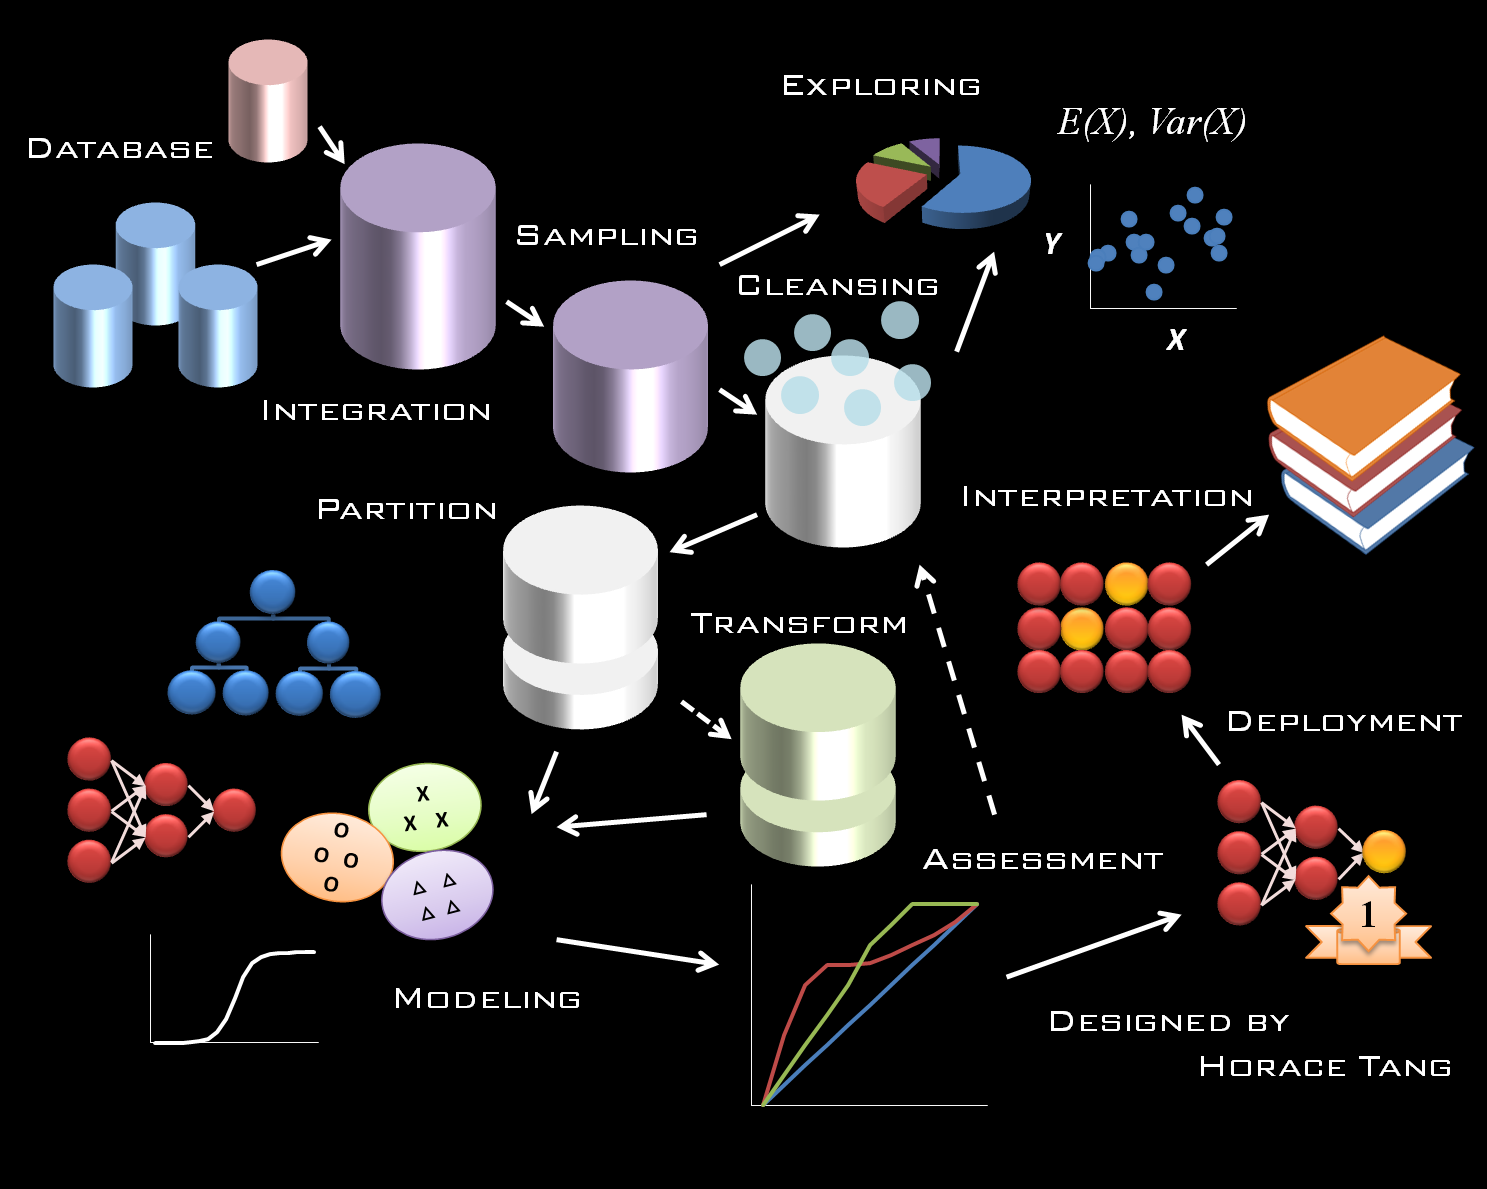

In [ ]:
display(Image(filename='Data Mining Process 02.png'))

In [ ]:
# Data Reading and Display
pokemon = pd.read_csv("pokemon.csv")
combat = pd.read_csv("combats.csv")
display(pokemon.head())
display(combat.head())
print(combat.shape)
print(pokemon.shape)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


(50000, 3)
(800, 12)


In [ ]:
# Data Exporation : Missing Value
print("Check Missing Values:")
print(pokemon.isnull().sum())
print("Check Missing Values:")
print(combat.isnull().sum())

Check Missing Values:
#               0
Name            1
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64
Check Missing Values:
First_pokemon     0
Second_pokemon    0
Winner            0
dtype: int64


In [ ]:
pokemon[pokemon['Name'].isnull()]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
62,63,NaN,Fighting,NaN,65,105,60,60,70,95,1,False


In [ ]:
print("This pokemon is before the missing Pokemon: " + pokemon['Name'][61])
print(pokemon[pokemon['Name'].isnull()])
print("This pokemon is after the missing Pokemon: " + pokemon['Name'][63])

This pokemon is before the missing Pokemon: Mankey
     # Name    Type 1 Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
62  63  NaN  Fighting    NaN  65     105       60       60       70     95   

    Generation  Legendary  
62           1      False  
This pokemon is after the missing Pokemon: Growlithe


Assuming that the indexes follow the same numbering system as the National Pokedex Number, we can look up the missing Pokemon that falls between the two by looking him up. I used this link. Primeape is the missing Pokemon. Update his name in the database.

In [ ]:
pokemon['Name'][62] = "Primeape"

In [ ]:
# calculate the win % of each pokemon 
# add the calculation to the pokemon dataset 
total_Wins = combat.Winner.value_counts()
# get the number of wins for each pokemon
numberOfWins = combat.groupby('Winner').count()

#both methods produce the same results
countByFirst = combat.groupby('Second_pokemon').count()
countBySecond = combat.groupby('First_pokemon').count()
print("Looking at the dimensions of our dataframes")
print("Count by first winner shape: " + str(countByFirst.shape))
print("Count by second winner shape: " + str(countBySecond.shape))
print("Total Wins shape : " + str(total_Wins.shape))

Looking at the dimensions of our dataframes
Count by first winner shape: (784, 2)
Count by second winner shape: (784, 2)
Total Wins shape : (783,)


In [ ]:
find_losing_pokemon= np.setdiff1d(countByFirst.index.values, numberOfWins.index.values)-1 #offset because the index and number are off by one
losing_pokemon = pokemon.iloc[find_losing_pokemon[0],]
print(losing_pokemon)

#                 231
Name          Shuckle
Type 1            Bug
Type 2           Rock
HP                 20
Attack             10
Defense           230
Sp. Atk            10
Sp. Def           230
Speed               5
Generation          2
Legendary       False
Name: 230, dtype: object


In [ ]:
numberOfWins = numberOfWins.sort_index()
numberOfWins['Total Fights'] = countByFirst.Winner + countBySecond.Winner
numberOfWins['Win Percentage']= numberOfWins.First_pokemon/numberOfWins['Total Fights']

In [ ]:
numberOfWins

,First_pokemon,Second_pokemon,Total Fights,Win Percentage
Winner,,,,
1,37,37,133,0.278195
2,46,46,121,0.380165
3,89,89,132,0.674242
4,70,70,125,0.560000
5,55,55,112,0.491071
...,...,...,...,...
796,39,39,105,0.371429
797,116,116,131,0.885496
798,60,60,119,0.504202


In [ ]:
pokemon

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [ ]:
# merge the winning dataset and the original pokemon dataset
results2 = pd.merge(pokemon, numberOfWins, right_index = True, left_on='#')
results3 = pd.merge(pokemon, numberOfWins, left_on='#', right_index = True, how='left')

# We can look at the difference between the two datasets to see which pokemon never recorded a fight
#missing_Pokemon = np.setdiff1d(pokemon.index.values, results3.index.values)
#subset the dataframe where pokemon win percent is NaN
results3[results3['Win Percentage'].isnull()]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,First_pokemon,Second_pokemon,Total Fights,Win Percentage
11,12,Blastoise,Water,NaN,79,83,100,85,105,78,1,False,NaN,NaN,NaN,NaN
32,33,Sandshrew,Ground,NaN,50,75,85,20,30,40,1,False,NaN,NaN,NaN,NaN
45,46,Wigglytuff,Normal,Fairy,140,70,45,85,50,45,1,False,NaN,NaN,NaN,NaN
65,66,Poliwag,Water,NaN,40,50,40,40,40,90,1,False,NaN,NaN,NaN,NaN
77,78,Victreebel,Grass,Poison,80,105,65,100,70,70,1,False,NaN,NaN,NaN,NaN
89,90,Magneton,Electric,Steel,50,60,95,120,70,70,1,False,NaN,NaN,NaN,NaN
143,144,Ditto,Normal,NaN,48,48,48,48,48,48,1,False,NaN,NaN,NaN,NaN
182,183,Ariados,Bug,Poison,70,90,70,60,60,40,2,False,NaN,NaN,NaN,NaN
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False,NaN,NaN,NaN,NaN
235,236,Ursaring,Normal,NaN,90,130,75,75,75,55,2,False,NaN,NaN,NaN,NaN


In [ ]:
results3[np.isfinite(results3['Win Percentage'])].sort_values(by = ['Win Percentage']).head(10)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,First_pokemon,Second_pokemon,Total Fights,Win Percentage
289,290,Silcoon,Bug,NaN,50,35,55,25,25,15,3,False,3.0,3.0,138.0,0.021739
189,190,Togepi,Fairy,NaN,35,20,65,40,65,20,2,False,3.0,3.0,122.0,0.024590
638,639,Solosis,Psychic,NaN,45,30,40,105,50,20,5,False,4.0,4.0,129.0,0.031008
236,237,Slugma,Fire,NaN,40,40,40,70,40,20,2,False,4.0,4.0,123.0,0.032520
576,577,Munna,Psychic,NaN,76,25,45,67,55,24,5,False,5.0,5.0,128.0,0.039062
188,189,Igglybuff,Normal,Fairy,90,30,15,40,20,15,2,False,5.0,5.0,115.0,0.043478
394,395,Wynaut,Psychic,NaN,95,23,48,23,48,23,3,False,6.0,6.0,130.0,0.046154
209,210,Wooper,Water,Ground,55,45,45,25,25,15,2,False,6.0,6.0,125.0,0.048000
291,292,Cascoon,Bug,NaN,50,35,55,25,25,15,3,False,7.0,7.0,133.0,0.052632
752,753,Spritzee,Fairy,NaN,78,52,60,63,65,23,6,False,8.0,8.0,133.0,0.060150


In [ ]:
results3[np.isfinite(results3['Win Percentage'])].sort_values(by = ['Win Percentage'], ascending = False ).head(10)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,First_pokemon,Second_pokemon,Total Fights,Win Percentage
154,155,Mega Aerodactyl,Rock,Flying,80,135,85,70,95,150,1,False,127.0,127.0,129.0,0.984496
512,513,Weavile,Dark,Ice,70,120,65,45,85,125,4,False,116.0,116.0,119.0,0.974790
703,704,Tornadus Therian Forme,Flying,NaN,79,100,80,110,90,121,5,True,121.0,121.0,125.0,0.968000
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,1,False,115.0,115.0,119.0,0.966387
153,154,Aerodactyl,Rock,Flying,80,105,65,60,75,130,1,False,136.0,136.0,141.0,0.964539
476,477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,4,False,124.0,124.0,129.0,0.961240
726,727,Greninja,Water,Dark,72,95,67,103,71,122,6,False,122.0,122.0,127.0,0.960630
716,717,Meloetta Pirouette Forme,Normal,Fighting,100,128,90,77,77,128,5,False,118.0,118.0,123.0,0.959350
164,165,Mega Mewtwo Y,Psychic,NaN,106,150,70,194,120,140,1,True,119.0,119.0,125.0,0.952000
349,350,Mega Sharpedo,Water,Dark,70,140,70,110,65,105,3,False,114.0,114.0,120.0,0.950000


In [ ]:
results3.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,First_pokemon,Second_pokemon,Total Fights,Win Percentage
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,783.000000,783.000000,783.000000,783.000000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,63.856960,63.856960,127.541507,0.501538
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,32.925941,32.925941,11.397402,0.254993
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,3.000000,3.000000,92.000000,0.021739
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,36.000000,36.000000,120.000000,0.284228
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,62.000000,62.000000,128.000000,0.491071
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,91.000000,91.000000,135.000000,0.717644
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000,152.000000,152.000000,164.000000,0.984496


Text(0.5, 1.0, 'Total Pokemon by Type 1')

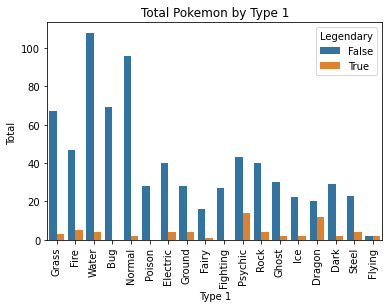

In [ ]:
import matplotlib.pyplot as plt
sns.set_color_codes("pastel")
ax = sns.countplot(x="Type 1", hue="Legendary", data=results3)
#f.set_xticklabels(rotation=30)
plt.xticks(rotation= 90)
plt.xlabel('Type 1')
plt.ylabel('Total ')
plt.title("Total Pokemon by Type 1")

Text(0.5, 1.0, 'Total Pokemon by Type 2')

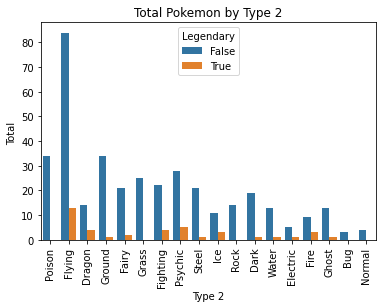

In [ ]:
ax = sns.countplot(x="Type 2", hue="Legendary", data=results3)
plt.xticks(rotation= 90)
plt.xlabel('Type 2')
plt.ylabel('Total ')
plt.title("Total Pokemon by Type 2")

In [ ]:
results3.groupby('Type 1').agg({"Win Percentage": "mean"}).sort_values(by = "Win Percentage")

,Win Percentage
Type 1,
Fairy,0.329300
Rock,0.404852
Steel,0.424529
Poison,0.433262
Bug,0.439006
Ice,0.439604
Grass,0.440364
Water,0.469357
Fighting,0.475616


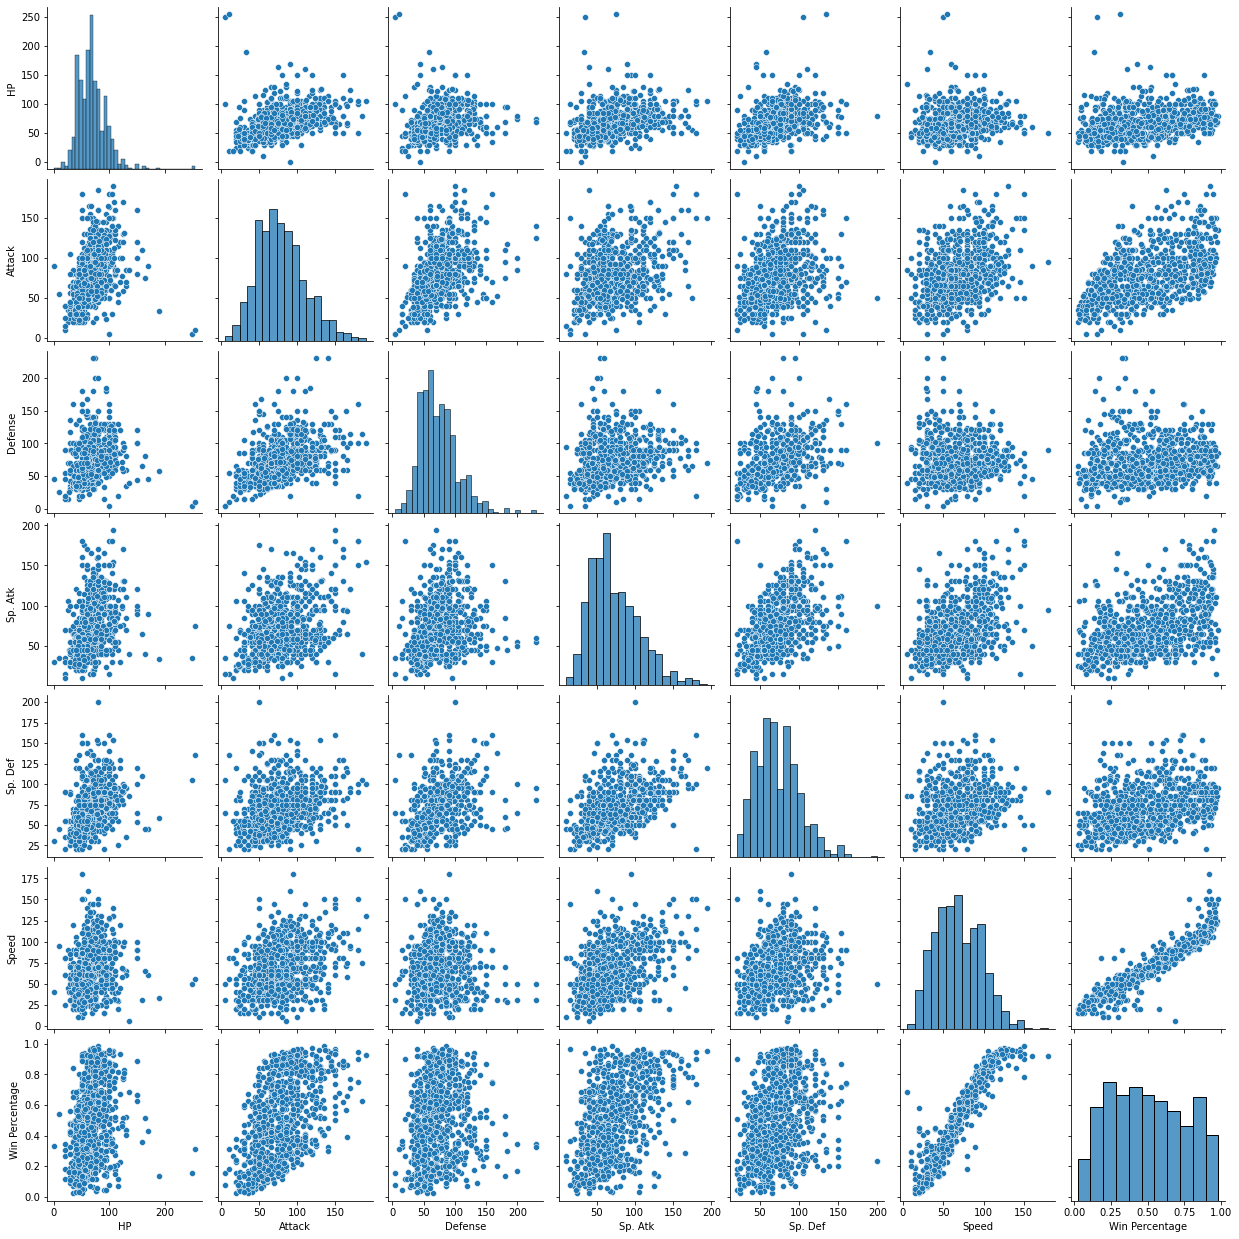

In [ ]:
#sns.distplot(results3["Win Percentage"].dropna(), bins=20)
col = ['Type 1','HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Win Percentage']
#results3.loc[:,'HP':'Speed'].corr()
sns.pairplot(results3.loc[:,col].dropna())

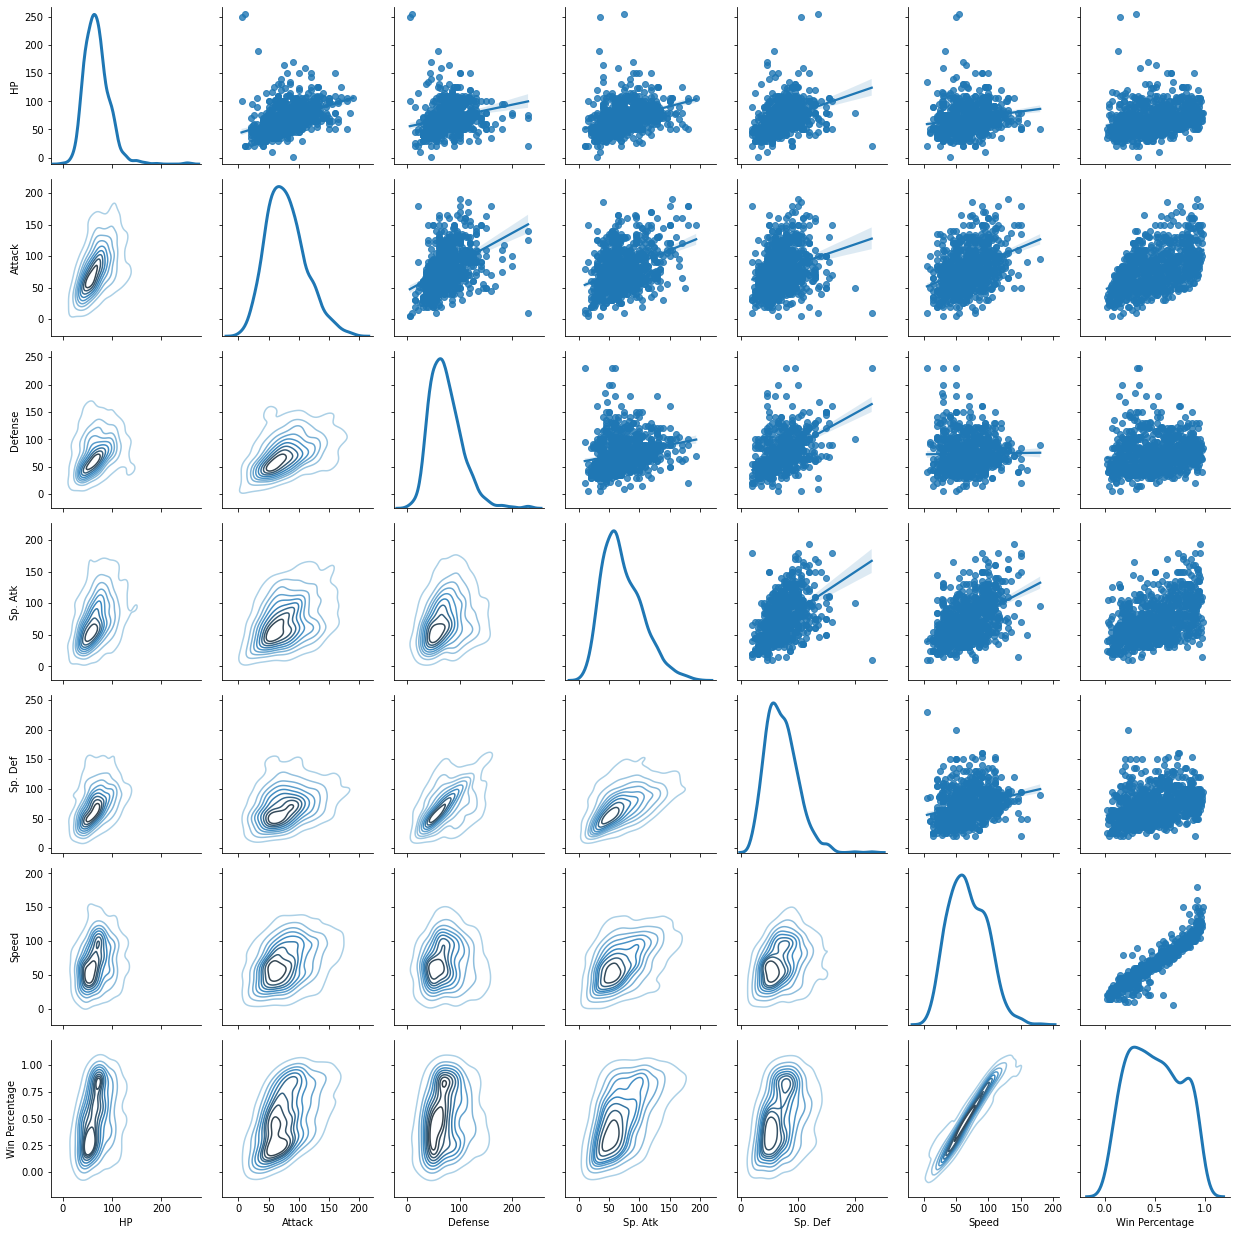

In [ ]:
import matplotlib.pyplot as plt

g = sns.PairGrid(results3.loc[:,col], diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(sns.regplot)
g.map_diag(sns.kdeplot, lw=3)

In [ ]:
results3.loc[:,col].corr()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Win Percentage
HP,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.258006
Attack,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.500181
Defense,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.129426
Sp. Atk,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.478940
Sp. Def,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.324218
Speed,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,0.937742
Win Percentage,0.258006,0.500181,0.129426,0.478940,0.324218,0.937742,1.000000


In [ ]:
corr = results3.loc[:,col].corr()
corr.style.background_gradient(cmap='coolwarm')

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Win Percentage
HP,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.258006
Attack,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.500181
Defense,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.129426
Sp. Atk,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.478940
Sp. Def,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.324218
Speed,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,0.937742
Win Percentage,0.258006,0.500181,0.129426,0.478940,0.324218,0.937742,1.000000


In [ ]:
# def correlation_matrix(df):
#     from matplotlib import pyplot as plt
#     from matplotlib import cm as cm

#     fig = plt.figure()
#     ax1 = fig.add_subplot(111)
#     cmap = cm.get_cmap('jet', 50)
#     cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
#     ax1.grid(True)
#     plt.title('Pokemon Feature Correlation')
#     labels=['Type 1','HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Win %']
#     ax1.set_xticklabels(labels,fontsize=7)
#     ax1.set_yticklabels(labels,fontsize=7)
#     # Add colorbar, make sure to specify tick locations to match desired ticklabels
#     fig.colorbar(cax, ticks=[0.00,.05,.10,.15,.20,.25,.30,.35,.40,.45,.50,.55,.60,.65,.70,.75,.8,.85,.90,.95,1])
#     plt.show()

# correlation_matrix(results3.loc[:,col])

In [ ]:
!pip install statsmodels 

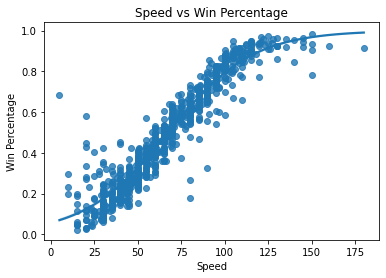

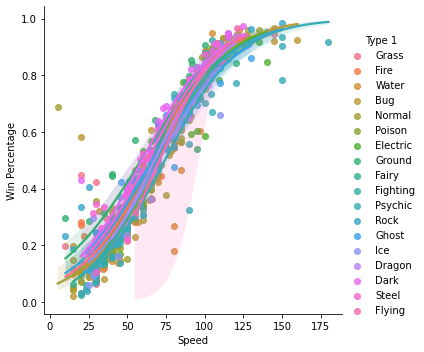

In [ ]:
import matplotlib.pyplot as plt
#f, (ax1, ax2) = plt.subplots(1,2)
sns.regplot(x="Speed", y="Win Percentage", data=results3, logistic=True).set_title("Speed vs Win Percentage")
sns.lmplot(x="Speed", y="Win Percentage", data=results3, hue = 'Type 1',  logistic=True)#.set_title("Speed vs Win Percentage")

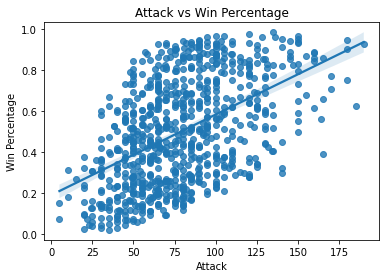

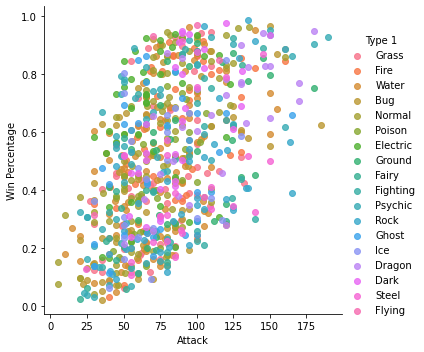

In [ ]:
ax = sns.regplot(x="Attack", y="Win Percentage", data=results3).set_title("Attack vs Win Percentage")
sns.lmplot(x="Attack", y="Win Percentage", data=results3, hue = 'Type 1',fit_reg =False)

In [ ]:
colList = list(dataset.columns[5:11]) + ["Win Percentage"]
colList

['Attack',
 'Defense',
 'Sp. Atk',
 'Sp. Def',
 'Speed',
 'Generation',
 'Win Percentage']

In [ ]:
dataset = results2.copy()

In [ ]:
corr = dataset[colList].corr()
corr.style.background_gradient(cmap='coolwarm')

,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Win Percentage
Attack,1.000000,0.464539,0.395211,0.288078,0.382310,0.050805,0.500181
Defense,0.464539,1.000000,0.237592,0.490118,0.025762,0.048046,0.129426
Sp. Atk,0.395211,0.237592,1.000000,0.529276,0.470548,0.034729,0.478940
Sp. Def,0.288078,0.490118,0.529276,1.000000,0.276715,0.030303,0.324218
Speed,0.382310,0.025762,0.470548,0.276715,1.000000,-0.028512,0.937742
Generation,0.050805,0.048046,0.034729,0.030303,-0.028512,1.000000,0.021021
Win Percentage,0.500181,0.129426,0.478940,0.324218,0.937742,0.021021,1.000000


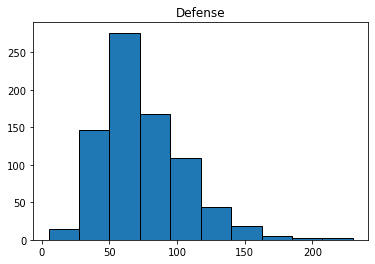

In [ ]:
col = "Defense"
plt.title(col)
hist = plt.hist(dataset[col], ec="black")
plt.show()

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

col = "Defense"
ListEncoder = [col]
dataset = results2.copy()
for idxq in range(2, 18):
    dataset[col + "_q_" + str(idxq)] = pd.qcut(dataset[col], q=idxq)
    dataset[col + "_q_en" + str(idxq)] = enc.fit_transform(dataset[[col + "_q_" + str(idxq)]])
    ListEncoder.append(col + "_q_en" + str(idxq))

dataset[col + '_q_Adaptive'] = pd.qcut(dataset[col], q=[0, .2, .4, .6, .8, 1])
dataset[col + "_q_en_Adaptive"] = enc.fit_transform(dataset[[col + '_q_Adaptive']])
ListEncoder.append(col + "_q_en_Adaptive")

dataset.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,...,Defense_q_14,Defense_q_en14,Defense_q_15,Defense_q_en15,Defense_q_16,Defense_q_en16,Defense_q_17,Defense_q_en17,Defense_q_Adaptive,Defense_q_en_Adaptive
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,...,"(44.0, 50.0]",2.0,"(48.0, 50.533]",3.0,"(47.0, 50.0]",3.0,"(45.0, 50.0]",3.0,"(48.0, 62.0]",1.0
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,...,"(60.0, 65.0]",5.0,"(62.0, 66.0]",6.0,"(60.0, 65.0]",6.0,"(60.0, 63.0]",6.0,"(62.0, 77.0]",2.0
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,...,"(80.0, 86.571]",9.0,"(82.333, 90.0]",10.0,"(80.0, 85.0]",10.0,"(80.0, 85.0]",11.0,"(77.0, 95.0]",3.0
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,...,"(120.143, 230.0]",13.0,"(122.0, 230.0]",14.0,"(107.25, 123.25]",14.0,"(110.0, 125.0]",15.0,"(95.0, 230.0]",4.0
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,...,"(35.0, 44.0]",1.0,"(42.267, 48.0]",2.0,"(40.0, 47.0]",2.0,"(40.0, 45.0]",2.0,"(4.999, 48.0]",0.0


In [ ]:
corr = dataset[ListEncoder + ["Win Percentage"]].corr()
corr.style.background_gradient(cmap='coolwarm')

,Defense,Defense_q_en2,Defense_q_en3,Defense_q_en4,Defense_q_en5,Defense_q_en6,Defense_q_en7,Defense_q_en8,Defense_q_en9,Defense_q_en10,Defense_q_en11,Defense_q_en12,Defense_q_en13,Defense_q_en14,Defense_q_en15,Defense_q_en16,Defense_q_en17,Defense_q_en_Adaptive,Win Percentage
Defense,1.000000,0.775334,0.854273,0.895119,0.904608,0.916757,0.922328,0.931880,0.927001,0.930147,0.935100,0.931693,0.931810,0.937337,0.936972,0.942955,0.936430,0.904608,0.129426
Defense_q_en2,0.775334,1.000000,0.821350,0.894052,0.852505,0.879326,0.870388,0.866786,0.867959,0.871872,0.857903,0.866332,0.866610,0.877364,0.861804,0.861990,0.867741,0.852505,0.163599
Defense_q_en3,0.854273,0.821350,1.000000,0.914869,0.923698,0.957661,0.941424,0.941127,0.950373,0.940463,0.931229,0.946680,0.943598,0.947078,0.941510,0.940831,0.944137,0.923698,0.194663
Defense_q_en4,0.895119,0.894052,0.914869,1.000000,0.950578,0.961133,0.954852,0.975735,0.967695,0.964724,0.966492,0.971415,0.971791,0.968150,0.968966,0.968122,0.966368,0.950578,0.194617
Defense_q_en5,0.904608,0.852505,0.923698,0.950578,1.000000,0.968263,0.967991,0.970904,0.971981,0.985786,0.975290,0.978594,0.978348,0.976250,0.983058,0.975225,0.978070,1.000000,0.196542
Defense_q_en6,0.916757,0.879326,0.957661,0.961133,0.968263,1.000000,0.977430,0.981018,0.983641,0.983635,0.983819,0.989830,0.984198,0.983630,0.984200,0.985953,0.984386,0.968263,0.185097
Defense_q_en7,0.922328,0.870388,0.941424,0.954852,0.967991,0.977430,1.000000,0.980446,0.985510,0.986742,0.982999,0.985028,0.987561,0.992687,0.986392,0.989828,0.989108,0.967991,0.198960
Defense_q_en8,0.931880,0.866786,0.941127,0.975735,0.970904,0.981018,0.980446,1.000000,0.988909,0.987802,0.992361,0.991432,0.988994,0.991616,0.991654,0.994015,0.992148,0.970904,0.183974
Defense_q_en9,0.927001,0.867959,0.950373,0.967695,0.971981,0.983641,0.985510,0.988909,1.000000,0.988877,0.991169,0.991891,0.990479,0.992793,0.993428,0.991366,0.992246,0.971981,0.196392
Defense_q_en10,0.930147,0.871872,0.940463,0.964724,0.985786,0.983635,0.986742,0.987802,0.988877,1.000000,0.989982,0.992908,0.992111,0.992556,0.993747,0.993011,0.993515,0.985786,0.202231


In [ ]:
dataset

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,First_pokemon,Second_pokemon,Total Fights,Win Percentage
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,37,37,133,0.278195
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,46,46,121,0.380165
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,89,89,132,0.674242
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,70,70,125,0.560000
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,55,55,112,0.491071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,39,39,105,0.371429
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,116,116,131,0.885496
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,60,60,119,0.504202
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,89,89,144,0.618056


In [ ]:
#remove rows with NA values because it will cause errors when fitting to the model
dataset.dropna(axis=0, how='any')
# Splitting the dataset into the Training set and Test set
X = dataset.iloc[:, 5:11].values # Attack , Defense, Sp. Atk, Sp. Def, Speed, Generation
y = dataset.iloc[:, 15].values   # 

# Encoding categorical data (if there is some)
# In this case it could be pokemon type
#'''from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#labelencoder = LabelEncoder()
#X[:, 3] = labelencoder.fit_transform(X[:, 3])
#onehotencoder = OneHotEncoder(categorical_features = [3])
#X = onehotencoder.fit_transform(X).toarray()'''

# Avoiding the Dummy Variable Trap
#X = X[:, 1:]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
def ml_linearreg(X_train, X_test, y_train, y_test):
    # Fitting Multiple Linear Regression to the Training set
    from sklearn.linear_model import LinearRegression
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    print(regressor.score(X_train, y_train))
    # Predicting the Test set results
    y_pred = regressor.predict(X_test)

    # Validating the results
    from sklearn.metrics import mean_absolute_error
    from math import sqrt
    mae = mean_absolute_error(y_test, y_pred)
    #print("Mean Absolute Error: " + str(mae))
    return mae

ml_linearreg(X_train, X_test, y_train, y_test)

0.907614232004021


0.06143408809230802

In [ ]:
# Feature Scaling
#from sklearn.preprocessing import StandardScaler
#sc_X = StandardScaler()
#sc_y = StandardScaler()
#X = sc_X.fit_transform(X)
#y = sc_y.fit_transform(y)
def ml_svm(X_train, X_test, y_train, y_test):
    # Fitting SVR to the dataset
    from sklearn.svm import SVR
    regressor = SVR(kernel = 'linear')
    regressor.fit(X_train, y_train)
    print(regressor.score(X_train, y_train))

    #Predict Output
    y_pred= regressor.predict(X_test)
    #y_pred = sc_y.inverse_transform(y_pred)

    from sklearn.metrics import mean_absolute_error
    from math import sqrt
    mae = mean_absolute_error(y_test, y_pred)
    #print("Mean Absolute Error: " + str(mae))
    return mae

ml_svm(X_train, X_test, y_train, y_test)

0.9065078337237095


0.06360099438357145

In [ ]:
#feature scaling not needed

def ml_decisiontree(X_train, X_test, y_train, y_test):
    # Fitting Decision Tree Regression to the dataset
    from sklearn.tree import DecisionTreeRegressor
    regressor = DecisionTreeRegressor(random_state = 0)
    regressor.fit(X_train, y_train)
    print(regressor.score(X_train, y_train))

    # Predicting a new result
    y_pred = regressor.predict(X_test)

    from sklearn.metrics import mean_absolute_error
    from math import sqrt
    mae = mean_absolute_error(y_test, y_pred)
    #print("Mean Absolute Error: " + str(mae))
    return mae

ml_decisiontree(X_train, X_test, y_train, y_test)

0.9997364519875158


0.05780669034067889

In [ ]:
# no feature scaling needed
def ml_randomforest(X_train, X_test, y_train, y_test):
    # Fitting Random Forest Regression to the dataset
    from sklearn.ensemble import RandomForestRegressor
    regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
    regressor.fit(X_train, y_train)
    print(regressor.score(X_train, y_train))

    # Predicting a new result
    y_pred = regressor.predict(X_test)

    from sklearn.metrics import mean_absolute_error
    from math import sqrt
    mae = mean_absolute_error(y_test, y_pred)
    #print("Mean Absolute Error: " + str(mae))
    return mae

ml_randomforest(X_train, X_test, y_train, y_test)

0.9901863583088816


0.04939134059135844

In [ ]:
def ml_xgboost(X_train, X_test, y_train, y_test):
    import xgboost
    # fitting XGBoost to training set
    xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75, colsample_bytree=1, max_depth=7)
    xgb.fit(X_train,y_train)
    print(xgb.score(X_train, y_train))
    # Prediction
    y_pred = xgb.predict(X_test)
    #print(explained_variance_score(y_pred ,y_test))
    from sklearn.metrics import mean_absolute_error
    from math import sqrt
    mae = mean_absolute_error(y_test, y_pred)
    #print("Mean Absolute Error: " + str(mae))
    return mae

ml_xgboost(X_train, X_test, y_train, y_test)

0.9973424715173221


0.04763679442687798

In [ ]:
#store all the ML results in an array
all_stats = [ml_linearreg(X_train, X_test, y_train, y_test), ml_svm(X_train, X_test, y_train, y_test), ml_decisiontree(X_train, X_test, y_train, y_test), ml_randomforest(X_train, X_test, y_train, y_test), ml_xgboost(X_train, X_test, y_train, y_test)]
#all_stats

0.907614232004021
0.9065078337237095
0.9997364519875158
0.9901863583088816
0.9973424715173221


In [ ]:
#PCA
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Applying PCA
from sklearn.decomposition import PCA
#pca = PCA(n_components = None)
pca = PCA(n_components = 3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
# Provides a vector of the variance explained by each component
explained_variance = pca.explained_variance_ratio_
print("This is the variance explained by the principle components")
print(explained_variance)

This is the variance explained by the principle components
[0.41314124 0.17695566 0.16108936]


In [ ]:
# run PCA transformed data on ML algos
PCA = [ml_linearreg(X_train, X_test, y_train, y_test), ml_svm(X_train, X_test, y_train, y_test), ml_decisiontree(X_train, X_test, y_train, y_test), ml_randomforest(X_train, X_test, y_train, y_test), ml_xgboost(X_train, X_test, y_train, y_test)]
#PCA
#ml_linearreg(X_train, X_test, y_train, y_test)
#ml_svm(X_train, X_test, y_train, y_test)
#ml_decisiontree(X_train, X_test, y_train, y_test)
#ml_randomforest(X_train, X_test, y_train, y_test)
#ml_xgboost(X_train, X_test, y_train, y_test)

0.7536920624122632
0.7526006202793896
0.9997364519875158
0.9604959864846145
0.9841575941927941


In [ ]:
# reduce the features to only speed and attack. 
dataset = results2
dataset.dropna(axis=0, how='any')
# Splitting the dataset into the Training set and Test set
X = dataset.loc[:, ['Attack','Speed']].values
y = dataset.loc[:, ['Win Percentage']].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#ml_linearreg(X_train, X_test, y_train, y_test)
#ml_svm(X_train, X_test, y_train, y_test)
#ml_decisiontree(X_train, X_test, y_train, y_test)
#ml_randomforest(X_train, X_test, y_train, y_test)
#ml_xgboost(X_train, X_test, y_train, y_test)

reduced_stats = [ml_linearreg(X_train, X_test, y_train, y_test), ml_svm(X_train, X_test, y_train, y_test), ml_decisiontree(X_train, X_test, y_train, y_test), ml_randomforest(X_train, X_test, y_train, y_test), ml_xgboost(X_train, X_test, y_train, y_test)]

0.9049921104553327
0.9040040161126808
0.9930604401118848
0.9859675208484993
0.9878152864268227


In [ ]:
#compare results from the 3 trials 
ml_results = pd.DataFrame({'All Factors': all_stats, 'Reduced Factors': reduced_stats, 'PCA': PCA})
ml_results.rename(index = {0:'Linear',1:'SVM', 2:'Decision Tree', 3:'Random Forest', 4:'XGBoost'})

,All Factors,Reduced Factors,PCA
Linear,0.061434,0.062812,0.099937
SVM,0.063601,0.064739,0.099990
Decision Tree,0.057807,0.054356,0.129971
Random Forest,0.049391,0.049585,0.096637
XGBoost,0.047637,0.050757,0.093067
